<a href="https://colab.research.google.com/github/ak-ghoul/Deep-Learning/blob/master/FeedForward_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd

from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
from tqdm import tqdm_notebook

In [0]:
class Sigmoid:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def model(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w_mse(self, x, y):
    y_pred = self.model(self.perceptron(x))
    
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b_mse(self, x, y):
    y_pred = self.model(self.perceptron(x))
    
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def grad_w_ce(self, x, y):
    y_pred = self.model(self.perceptron(x))
    
    if y == 0:
      return y_pred * x
    elif y == 1:
      return -1 * (1 - y_pred) * x
    else:
      raise ValueError('y should be 0 or 1')
    
  def grad_b_ce(self, x, y):
    y_pred = self.model(self.perceptron(x))
      
    if y == 0:
      return y_pred
    elif y == 1:
      return -1 * (1 - y_pred)
    else:
      raise ValueError('y should be 0 or 1')
      
  def predict(self, X):
      Y_pred = []
      for x in X:
        y_pred = self.model(self.perceptron(x))
        Y_pred.append(y_pred)
      return np.array(Y_pred)  
      
  def fit(self, X, Y, epochs = 3, lr = 1, initialize = True, loss_fn = 'mse', display_loss = False):
      
      #inintialize w , b
    if initialize:
      self.w = np.random.randn(1,X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
        
    for i in tqdm_notebook(range(epochs), total = epochs, unit = 'epochs'):
      dw = 0
      db = 0
      for x,y in zip(X,Y):
        if loss_fn == 'mse':
          dw += self.grad_w_mse(x, y)
          db += self.grad_b_mse(x, y)
          
        if loss_fn == 'ce':
          dw += self.grad_w_ce(x, y)
          db += self.grad_b_ce(x, y)
            
      m = X.shape[1]    
      self.w -=  lr * dw/m
      self.b -= lr * db/m
        
      if display_loss:
          Y_pred = self.model(self.perceptron(X))
          if loss_fn == 'mse':
            loss[i] = mean_squared_error(Y, Y_pred)
          if loss_fn == 'ce':
            loss[i] = log_loss(Y, Y_pred)
      
    if display_loss:
      plt.plot(loss.values())
      if loss_fn == 'mse':
        plt.xlabel('Mean Squared Error')
      if loss_fn == 'ce':
        plt.xlabel('Cross Entropy Loss')
      plt.show()  
               
        

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list('',['red','orange','green'])

#Generate Data

In [4]:
data , labels = make_blobs(n_samples = 1000, n_features = 2, centers = 4, random_state = 0)  # label is the center index to which every data point belong to
print(data.shape, labels.shape)

(1000, 2) (1000,)


In [0]:
print(labels)

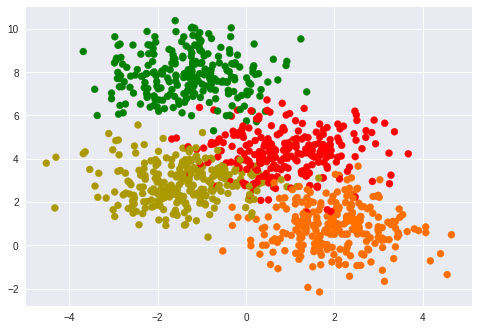

In [6]:
plt.scatter(data[:,0], data[:,1], c = labels, cmap = my_cmap)
plt.show()

In [0]:
labels_orig = labels
labels = np.mod(labels_orig, 2)

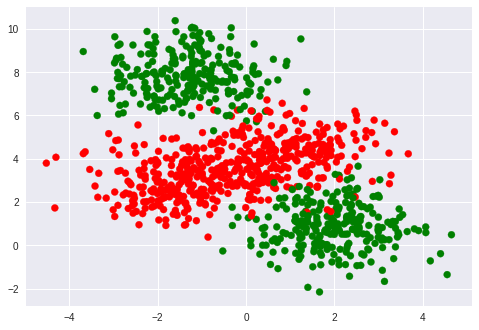

In [8]:
plt.scatter(data[:,0], data[:,1], cmap = my_cmap, c = labels)
plt.show()

In [9]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify = labels, random_state = 0)
print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape)

(750, 2) (250, 2) (750,) (250,)


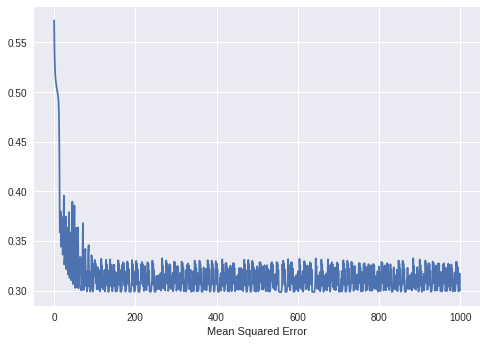

In [10]:
sn = Sigmoid()
sn.fit(X_train, Y_train, epochs = 1000, display_loss = True, lr = 0.2)

In [11]:
Y_pred_train = sn.predict(X_train)
Y_binary_pred_train = (Y_pred_train > 0.5).astype('int').ravel()
Y_pred_val = sn.predict(X_val)
Y_binary_pred_val = (Y_pred_val > 0.5).astype('int').ravel()
print('Train Accuracy: ',accuracy_score(Y_train,Y_binary_pred_train))
print("Test Accuracy: ",accuracy_score(Y_val,Y_binary_pred_val))

Train Accuracy:  0.68
Test Accuracy:  0.656


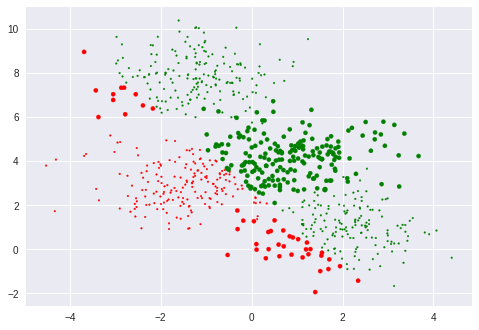

In [12]:
plt.scatter(X_train[:,0], X_train[:,1], c = Y_binary_pred_train, cmap = my_cmap, s = 15*(np.abs(Y_binary_pred_train - Y_train)+0.2)) #formula is to vary the size of the points just to clarify the wrong/right predicted points
plt.show()

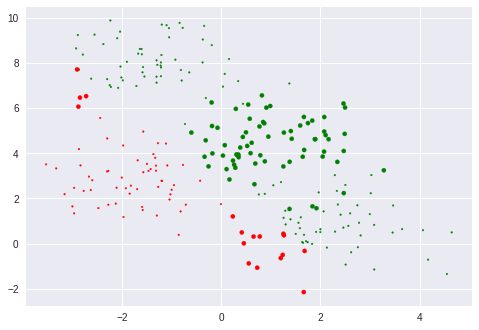

In [13]:
plt.scatter(X_val[:,0], X_val[:,1], c = Y_binary_pred_val, cmap = my_cmap, s = 15*(np.abs(Y_binary_pred_val - Y_val)+0.2))
plt.show()

#Classification using Feed Forward Network

In [0]:
class FirstFFNetwork:
  
  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    self.x1, self.x2 = x   #first column of x goes to x1 & second one to x2
    self.a1 = self.w1 * self.x1 + self.w2 * self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3 * self.x1 + self.w4 * self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5 * self.h1 + self.w6 * self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    return self.h3
                # grad function uses gradient descent algorithm to compute the values such that error is reduced.
     #grad function is the one which increases accuracy by decreasing error. Then we subtract these errors from original to increase accuracy
  def grad(self, x, y):
    y_pred = self.forward_pass(x)  #y_pred = self.h3, the overall output of neural network 
    
    self.dw5 = (y_pred - y) * y_pred * (1 - y_pred) * self.h1
    self.dw6 = (y_pred - y) * y_pred * (1 - y_pred) * self.h2
    self.db3 = (y_pred - y) * y_pred * (1 - y_pred) 
    
    self.dw1 = (y_pred - y) * y_pred * (1 - y_pred) * self.w5 * self.h1 * (1 - self.h1) * self.x1
    self.dw2 = (y_pred - y) * y_pred * (1 - y_pred) * self.w5 * self.h1 * (1 - self.h1) * self.x2
    self.db1 = (y_pred - y) * y_pred * (1 - y_pred) * self.w5 * self.h1 * (1 - self.h1)
    
    self.dw3 = (y_pred - y) * y_pred * (1 - y_pred) * self.w6 * self.h2 * (1 - self.h2) * self.x1
    self.dw4 = (y_pred - y) * y_pred * (1 - y_pred) * self.w6 * self.h2 * (1 - self.h2) * self.x2
    self.db2 = (y_pred - y) * y_pred * (1 - y_pred) * self.w6 * self.h2 * (1 - self.h2)
    
  
  def fit(self, X, Y, epochs = 5, lr = 1, display_loss = False, initialize = True):
    
    if initialize:
      
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
    
    if display_loss:
      loss = {}
      
    for i in tqdm_notebook(range(epochs), total = epochs, unit = 'epochs'):
      dw1,dw2,dw3,dw4,dw5,dw6,db1,db2,db3 = [0]*9
      for x,y in zip(X,Y):
        self.grad(x,y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        
      m = X.shape[1]
      self.w1 -= lr * dw1/m
      self.w2 -= lr * dw2/m
      self.w3 -= lr * dw3/m 
      self.w4 -= lr * dw4/m
      self.w5 -= lr * dw5/m
      self.w6 -= lr * dw6/m
      self.b1 -= lr * db1/m
      self.b2 -= lr * db2/m
      self.b3 -= lr * db3/m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y, Y_pred)
      
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)  

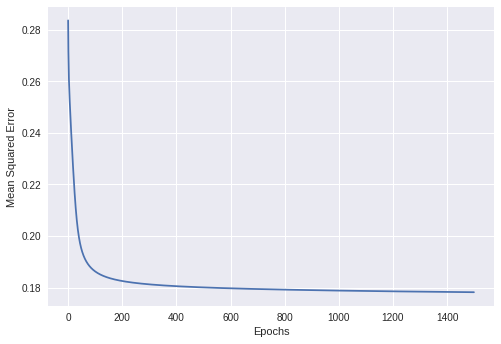

In [15]:
fn = FirstFFNetwork()
fn.fit(X_train, Y_train, epochs = 1500, lr = 0.01, display_loss = True)

In [16]:
Y_pred_train = fn.predict(X_train)
Y_binary_pred_train = (Y_pred_train >= 0.5).astype('int').ravel()
Y_pred_val = fn.predict(X_val)
Y_binary_pred_val = (Y_pred_val >= 0.5).astype('int').ravel()
print('Training Accuracy : ',accuracy_score(Y_binary_pred_train, Y_train))
print('Testing Accuracy : ',accuracy_score(Y_binary_pred_val, Y_val))

Training Accuracy :  0.7333333333333333
Testing Accuracy :  0.716


/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


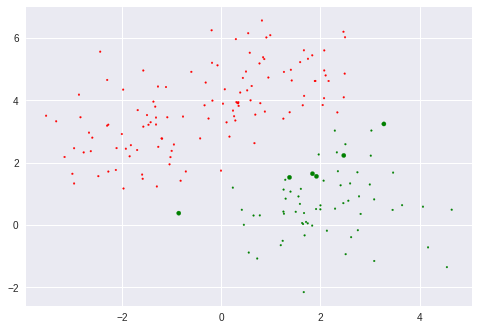

In [17]:
plt.scatter(X_val[:,0], X_val[:,1], c = Y_binary_pred_val, cmap = my_cmap, s = 15*((Y_binary_pred_val - Y_val)+0.2))
plt.show()

In [0]:
import warnings
warnings.simplefilter('ignore')

In [0]:
class FFSNNetwork:
  
  def __init__(self, n_inputs, hidden_sizes = [2]):
    self.nx = n_inputs  # number of inputs
    
    self.ny = 1   #number of outputs
    self.nh = len(hidden_sizes)  #number of hidden layers
    self.sizes = [self.nx] + hidden_sizes + [self.ny]  #size of each layer in network
    
    self.W = {}
    self.B = {}
    
    for i in range(self.nh + 1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
      self.B[i+1] = np.zeros((1, self.sizes[i+1]))
      
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    self.A = {}
    self.H = {}
    self.H[0] = x.reshape(1,-1)
    
    for i in range(self.nh +1):
      self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
      
    return self.H[self.nh+1]
  
  def grad_sigmoid(self, x):
    return x*(1-x)
  
  def grad(self, x, y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dA = {}
    self.dH = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))
    
  def fit(self, X, Y, epochs = 5, lr = 1, display_loss = False, initialize = True):
    
    if initialize:
      for i in range(self.nh + 1):
        self.W[i + 1] = np.random.randn(self.sizes[i], self.sizes[i+1])
        self.B[i + 1] = np.zeros((1, self.sizes[i+1]))
    
    if display_loss:
      loss = {}
      
    for i in tqdm_notebook(range(epochs), total = epochs, unit = 'epochs'):
      dW = {}
      dB = {}
      for j in range(self.nh + 1):
        dW[j+1] = np.zeros((self.sizes[j], self.sizes[j+1]))
        dB[j+1]  =np.zeros((1, self.sizes[j+1]))
      for x,y in zip(X,Y):
        self.grad(x,y)
        
        for j in range(self.nh + 1):
          dW[j+1] += self.dW[j+1]
          dB[j+1] += self.dB[j+1]
        
      m = X.shape[1]
      for j in range(self.nh + 1):
        self.W[j+1] -= lr * dW[j+1]/m
        self.B[j+1] -= lr * dB[j+1]/m
        
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred, Y)
        
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()  
    

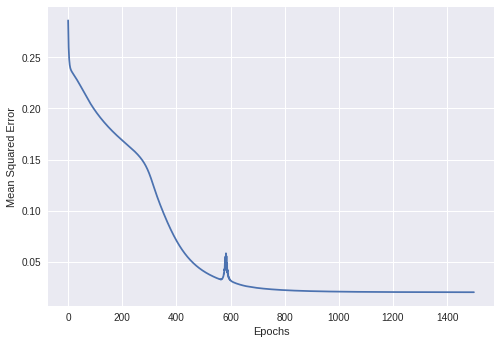

In [20]:
ffsn = FFSNNetwork(2, [2, 3])
ffsn.fit(X_train, Y_train, epochs = 1500, lr = 0.001, display_loss = True)

In [21]:
Y_pred_train = ffsn.predict(X_train)
Y_binary_pred_train = (Y_pred_train >= 0.5).astype('int').ravel()  #because of only one output direct binarisation is OK but for multiclass
Y_pred_val = ffsn.predict(X_val)  # classification we'll get output b/w 0s & 1s for all possible outputs in one hot vector. So, gotta use softmax.
Y_binary_pred_val = (Y_pred_val >= 0.5).astype('int').ravel()
print("Training Accuracy :", accuracy_score(Y_binary_pred_train, Y_train))
print('Test Accuracy :',accuracy_score(Y_binary_pred_val, Y_val))

Training Accuracy : 0.976
Test Accuracy : 0.94


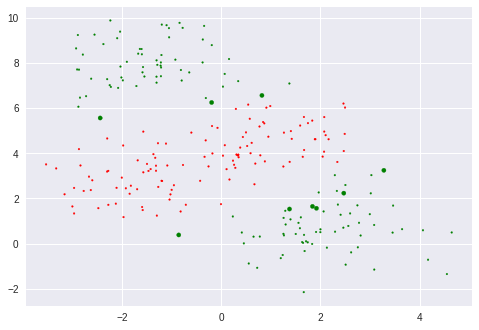

In [22]:
plt.scatter(X_val[:,0], X_val[:,1], c = Y_binary_pred_val, cmap = my_cmap, s = 15*((Y_binary_pred_val - Y_val)+0.2))
plt.show()

In [0]:
class FFSN_MultiClass:
  
  def __init__(self,n_inputs, n_outputs, hidden_layers = [3]):
    
    self.nx = n_inputs
    self.ny = n_outputs
    self.nh = len(hidden_layers)
    self.sizes = [self.nx] + hidden_layers + [self.ny]
    
    self.W = {}
    self.B = {}
    for i in range(self.nh + 1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
      self.B[i+1]  = np.zeros((1, self.sizes[i+1]))
      
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def SoftMax(self, x):
    exps = np.exp(x)
    return exps/np.sum(exps)
  
  def forward_pass(self, x):
    self.A = {}
    self.H = {}
    self.H[0] = x.reshape(1, -1)
    for i in range(self.nh):
      self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    self.A[self.nh+1] = np.matmul(self.H[self.nh], self.W[self.nh+1]) + self.B[self.nh+1]  
    self.H[self.nh+1] = self.SoftMax(self.A[self.nh+1])  
    return self.H[self.nh+1]
  
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()
  
  def grad_sigmoid(self, x):
    return x * (1-x)
  
  def cross_entropy(self,label,pred):
    yl=np.multiply(pred,label)
    yl=yl[yl!=0]
    yl=-np.log(yl)
    yl=np.mean(yl)
    return yl
  
  def grad(self, x, y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1])) 
  
  def fit(self, X, Y, display_loss = False, initialize = True, epochs = 100, lr = 1):
    if initialize:
      for i in range(self.nh + 1):
        self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
        self.B[i+1] = np.zeros((1, self.sizes[i+1]))
    
    if display_loss:
      loss = {}
      
    for i in tqdm_notebook(range(epochs), unit = 'epochs', total = epochs):
      dW = {}
      dB = {}
      for j in range(self.nh + 1):
        dW[j+1] = np.zeros((self.sizes[j], self.sizes[j+1]))
        dB[j+1] = np.zeros((1, self.sizes[j+1]))
      for x,y in zip(X,Y):
        self.grad(x, y)
        for j in range(self.nh+1):
          dW[j+1] += self.dW[j+1]
          dB[j+1] += self.dB[j+1]
        
      m = X.shape[1]
      for j in range(self.nh+1):
        self.W[j+1] -= lr * dW[j+1]/m
        self.B[j+1] -= lr * dB[j+1]/m
        
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = self.cross_entropy(Y, Y_pred)
      
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('C_E')
      plt.show()
      

In [41]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels_orig, stratify = labels_orig, random_state = 0)
print(X_train.shape, Y_train.shape, labels_orig.shape)

(750, 2) (750,) (1000,)


In [42]:
ohe = OneHotEncoder()
# 0 -> (1, 0, 0, 0), 1 -> (0, 1, 0, 0), 2 -> (0, 0, 1, 0), 3 -> (0, 0, 0, 1)
Y_oh_train = ohe.fit_transform(np.expand_dims(Y_train, 1)).toarray()
Y_oh_val = ohe.fit_transform(np.expand_dims(Y_val, 1)).toarray()
print(Y_oh_train.shape, Y_oh_val.shape)

(750, 4) (250, 4)


In [0]:
print(Y_oh_val)

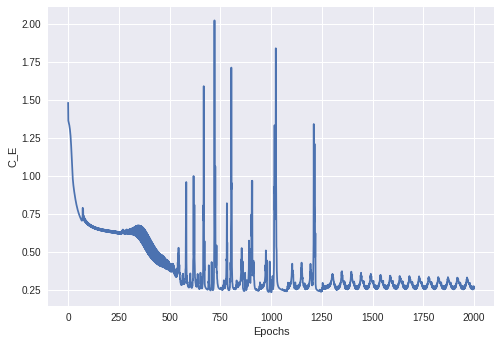

In [49]:
ffsn_multi = FFSN_MultiClass(2,4,[2,3])
ffsn_multi.fit(X_train, Y_oh_train, epochs = 2000, lr = 0.0045, display_loss = True)

In [50]:
Y_pred_train = ffsn_multi.predict(X_train)
Y_pred_orig_train = np.argmax(Y_pred_train,1)
Y_pred_val = ffsn_multi.predict(X_val)
Y_pred_orig_val = np.argmax(Y_pred_val,1)
print("Training Accuracy :",accuracy_score(Y_pred_orig_train,Y_train))
print("Testing Accuracy :",accuracy_score(Y_pred_orig_val,Y_val))

Training Accuracy : 0.9173333333333333
Testing Accuracy : 0.912


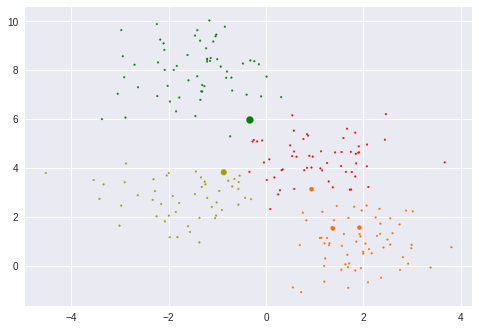

In [51]:
plt.scatter(X_val[:,0], X_val[:,1], cmap = my_cmap, c = Y_pred_orig_val, s = 15*((Y_pred_orig_val - Y_val)+0.2))
plt.show()